In [1]:
!pip install mplcursors

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Importing The Libraries
</h1>
</div>

In [2]:
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.utils import class_weight

import tensorflow as tf
import mplcursors
from tensorflow.keras import models, layers
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import matplotlib.image as mpimg
import numpy as np
import os
import shutil
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Evaluation Plotter

</h1>
</div>

In [3]:
def plot_plots(data):
    plt.style.use('dark_background')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(data['loss'], color='cyan', linewidth=2, label='Training Loss')
    ax1.plot(data['val_loss'], color='magenta', linewidth=2, label='Validation Loss')
    ax1.set_xlabel('Epochs', color='white')
    ax1.set_ylabel('Loss', color='white')
    ax1.set_title('Loss Over Epochs', color='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.legend(loc='upper right', facecolor='black', edgecolor='white', fontsize=10)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5)
    mplcursors.cursor(ax1, hover=True)

    ax2.plot(data['accuracy'], color='lime', linewidth=2, label='Training Accuracy')
    ax2.plot(data['val_accuracy'], color='orange', linewidth=2, label='Validation Accuracy')
    ax2.set_xlabel('Epochs', color='white')
    ax2.set_ylabel('Accuracy', color='white')
    ax2.set_title('Accuracy Over Epochs', color='white')
    ax2.tick_params(axis='y', colors='white')
    ax2.legend(loc='lower right', facecolor='black', edgecolor='white', fontsize=10)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5)
    mplcursors.cursor(ax2, hover=True)

    plt.tight_layout()
    plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Download Dataset from ==> <a href = "https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia"> Kaggle </a>

</h1>
</div>

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.28G/2.29G [00:16<00:00, 172MB/s]
100% 2.29G/2.29G [00:16<00:00, 146MB/s]


## **Unzip Folder**

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('/content/chest-xray-pneumonia')
zip_ref.close()

# **Spliting Data:**
- 80% ==> Training
- 20% ==> Testing
- 20% ==> Validation

In [6]:
train_dir = "/content/chest-xray-pneumonia/chest_xray/train"
val_dir = "/content/chest-xray-pneumonia/chest_xray/val"
test_dir = "/content/chest-xray-pneumonia/chest_xray/test"
all_data_dir = "/content/chest-xray-pneumonia/all_data"

os.makedirs(all_data_dir, exist_ok=True)

original_dirs = [train_dir, val_dir, test_dir]

for folder in original_dirs:
    for label in ['NORMAL', 'PNEUMONIA']:
        src_dir = os.path.join(folder, label)
        dest_dir = os.path.join(all_data_dir, label)
        os.makedirs(dest_dir, exist_ok=True)
        for file in os.listdir(src_dir):
            shutil.copy(os.path.join(src_dir, file), os.path.join(dest_dir, file))

print("All data has been consolidated into:", all_data_dir)

All data has been consolidated into: /content/chest-xray-pneumonia/all_data


## **Splitting**

In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

train_dir = "/content/chest-xray-pneumonia/chest_xray/train"
val_dir = "/content/chest-xray-pneumonia/chest_xray/val"
test_dir = "/content/chest-xray-pneumonia/chest_xray/test"
all_data_dir = "/content/chest-xray-pneumonia/all_data"

os.makedirs(all_data_dir, exist_ok=True)

original_dirs = [train_dir, val_dir, test_dir]

for folder in original_dirs:
    for label in ['NORMAL', 'PNEUMONIA']:
        src_dir = os.path.join(folder, label)
        dest_dir = os.path.join(all_data_dir, label)
        os.makedirs(dest_dir, exist_ok=True)
        for file in os.listdir(src_dir):
            shutil.copy(os.path.join(src_dir, file), os.path.join(dest_dir, file))

print("All data has been consolidated into:", all_data_dir)

source_dir = all_data_dir
base_dir = "/content/chest-xray-pneumonia/Splitted"
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

for folder in ['train', 'val', 'test']:
    for class_name in ['NORMAL', 'PNEUMONIA']:
        os.makedirs(os.path.join(base_dir, folder, class_name), exist_ok=True)

for class_name in ['NORMAL', 'PNEUMONIA']:
    class_dir = os.path.join(source_dir, class_name)
    images = os.listdir(class_dir)

    train_images, temp_images = train_test_split(images, test_size=0.2, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(val_dir, class_name, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, class_name, img))

print("Data has been successfully split into train, val, and test sets.")

All data has been consolidated into: /content/chest-xray-pneumonia/all_data
Data has been successfully split into train, val, and test sets.


## **Class Counts**

In [8]:
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

In [9]:
all_data_dir = "/content/chest-xray-pneumonia/Splitted/train"
class_distribution = count_images(all_data_dir)

for class_name, count in class_distribution.items():
    print(f"{class_name}: {count} images")

NORMAL: 1266 images
PNEUMONIA: 3418 images


## **Class Weights**

In [10]:
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(['NORMAL', 'PNEUMONIA']),
    y=['NORMAL'] * class_distribution['NORMAL'] + ['PNEUMONIA'] * class_distribution['PNEUMONIA']
)

class_weight_dict = {
    'NORMAL': class_weights[0],
    'PNEUMONIA': class_weights[1]
}

print("Class Weights:", class_weight_dict)

Class Weights: {'NORMAL': 1.8499210110584519, 'PNEUMONIA': 0.6851960210649503}


<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Image Generator

</h1>
</div>

**WORKING**
- The ImageDataGenerator function is used to load image data from a directory.
- Images are resized to 256x256 pixels and grouped into batches of 32 for efficient processing.
- Labels are inferred from the directory structure and represented in a categorical format.
- Pixel values of the images are normalized to a range of [0, 1] by dividing by 255.0 for consistent model training.

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Training, Testing and Validation Data

</h1>
</div>

In [12]:
train_data = train_datagen.flow_from_directory(
    "/content/chest-xray-pneumonia/Splitted/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
)
val_data = val_datagen.flow_from_directory(
    "/content/chest-xray-pneumonia/Splitted/val",
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
)
test_data = test_datagen.flow_from_directory(
    "/content/chest-xray-pneumonia/Splitted/test",
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
)

Found 4684 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
Found 587 images belonging to 2 classes.


<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Class Counts

</h1>
</div>

In [13]:
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_counts = count_images("/content/chest-xray-pneumonia/Splitted/train")
val_counts = count_images("/content/chest-xray-pneumonia/Splitted/val")
test_counts = count_images("/content/chest-xray-pneumonia/Splitted/test")

print("Training Set Class Distribution:", train_counts)
print("Validation Set Class Distribution:", val_counts)
print("Test Set Class Distribution:", test_counts)

Training Set Class Distribution: {'NORMAL': 1266, 'PNEUMONIA': 3418}
Validation Set Class Distribution: {'NORMAL': 158, 'PNEUMONIA': 427}
Test Set Class Distribution: {'NORMAL': 159, 'PNEUMONIA': 428}


<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Visualization    
</h1>
</div>

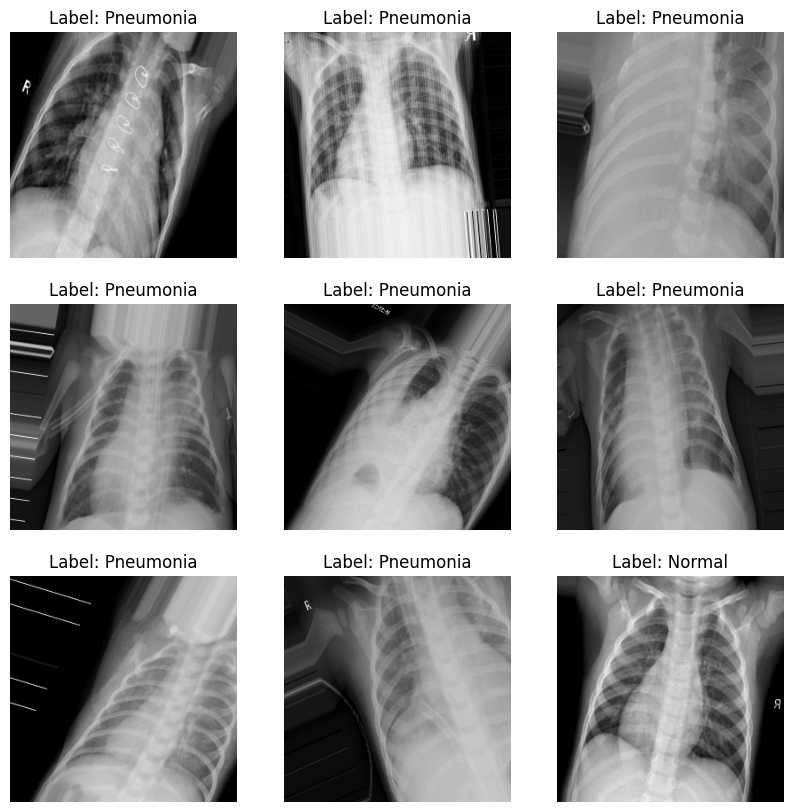

In [14]:
images, labels = next(train_data)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title("Label: " + ("Pneumonia" if labels[i] else "Normal"))
    plt.axis("off")
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Transfer Learning with DenseNet121
</h1>
</div>

**WORKING**
- The code initializes a `DenseNet121` model with weights pre-trained on the ImageNet dataset.
- The `include_top=False argument` specifies that the model should not include the fully connected layers at the top of the network, which are typically used for ImageNet classification.
- The `input_shape=(256,256,3) argument` specifies the shape of the input images that the model expects, which is `256x256` pixels with 3 channels (RGB).
- The initialized model `conv_base` can be used as a feature extractor to extract features from images, which can then be used as input to a custom classification head.

In [23]:
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3),
    pooling='avg'
)

In [24]:
# base_model.summary()

**WHY FALSE ?**
- Setting conv_base.trainable = False freezes the weights of the pre-trained DenseNet121 model.
- This is done to prevent the weights from being updated during the training of the custom classification head.
- Freezing the pre-trained weights helps in utilizing the learned features from the ImageNet dataset without altering them.
- It also reduces the computational cost and training time, as only the weights of the custom classification head will be trained.

In [25]:
base_model.trainable = False

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Sequential Model
</h1>
</div>

**WORKING**

- It initializes a Sequential model and adds the `pre-trained` DenseNet121` model (base_model) ` as the base.
- The model flattens the output from the base model and adds two fully connected layers with `ReLU activation`.
- `Batch normalization` is applied after each fully connected layer to improve training stability and speed.

In [26]:
model = Sequential([
    base_model,
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.35),
    BatchNormalization(),
    Dense(120, activation='relu'),
    Dense(1, activation='sigmoid')
])

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Compile Model
</h1>
</div>

**WORKING**

- The compile method is used to configure the model for training.
- The optimizer=Adam(learning_rate=0.0001) argument specifies the Adam optimizer with a learning rate of 0.0001.
- The loss='categorical_crossentropy' argument specifies the loss function used for training, which is categorical crossentropy for multi-class classification.
- The metrics=['accuracy'] argument specifies the metric used to evaluate the model, which is accuracy in this case.

In [27]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Training
</h1>
</div>

**WORKING**
- The `fit` method is used to train the model on the training data (`train_data`) for a specified number of epochs (100 in this case).
- The `validation_data=val_data` argument specifies the validation data to evaluate the model performance after each epoch.
- The `history` variable stores the training history, including metrics such as loss and accuracy, which can be used for analysis and visualization.

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=[early_stopping]
)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 153s 854ms/step - accuracy: 0.7517 - loss: 0.4986 - val_accuracy: 0.9128 - val_loss: 0.3789
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 113s 733ms/step - accuracy: 0.8893 - loss: 0.2719 - val_accuracy: 0.9231 - val_loss: 0.2434
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 112s 730ms/step - accuracy: 0.9069 - loss: 0.2326 - val_accuracy: 0.9231 - val_loss: 0.2237
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 117s 764ms/step - accuracy: 0.9157 - loss: 0.2142 - val_accuracy: 0.9214 - val_loss: 0.2010
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 137s 730ms/step - accuracy: 0.9313 - loss: 0.1793 - val_accuracy: 0.9179 - val_loss: 0.2010
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 147s 761ms/step - accuracy: 0.9316 - loss: 0.1736 - val_accuracy: 0.9231 - val_loss: 0.1826
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 137s 728ms/step - accuracy: 0.9222 - loss: 0.1855 - val_accuracy: 0.9282 - val_loss: 0.1703
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 142s 728ms/step - accuracy: 0.9309 -

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Evaluation
</h1>
</div>


# **😌 Testing Accuracy 95.35%**:
  - Means that, when the model is evaluated on a separate set of data that it has not seen during training or validation, it correctly predicts the outcome 95.35% of the time. This is a good result and indicates that the model is performing well and generalizes well to new, unseen data.

In [29]:
evaluate = model.evaluate(test_data)

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 474ms/step - accuracy: 0.9535 - loss: 0.1297


In [30]:
import pandas as pd
result_adam = pd.DataFrame(history.history)
result_adam.tail(5)

,accuracy,loss,val_accuracy,val_loss
15,0.950897,0.135398,0.948718,0.124608
16,0.945773,0.147071,0.947009,0.128219
17,0.947481,0.136496,0.938462,0.138015
18,0.952605,0.125825,0.935043,0.153536
19,0.947694,0.133856,0.941880,0.146299


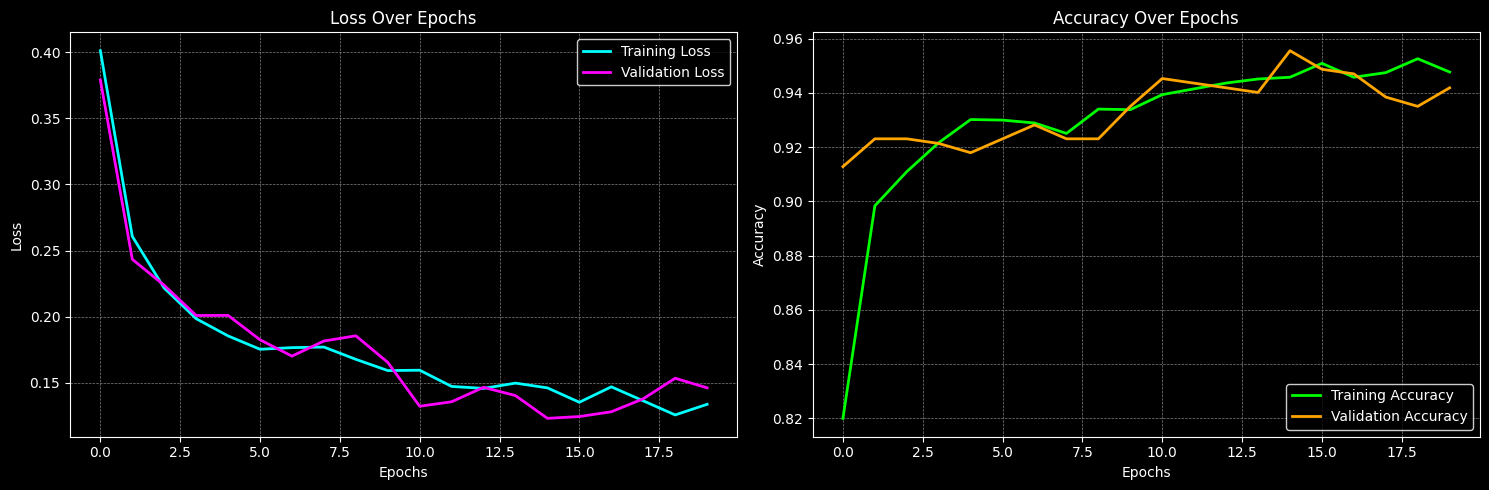

In [31]:
plot_plots(result_adam)

### **Confusion Matrix**

In [33]:
y_pred_probs = model.predict(test_data)

y_pred_classes = (y_pred_probs > 0.5).astype(int)

y_true = test_data.classes

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 352ms/step


In [34]:
cm = confusion_matrix(y_true, y_pred_classes)

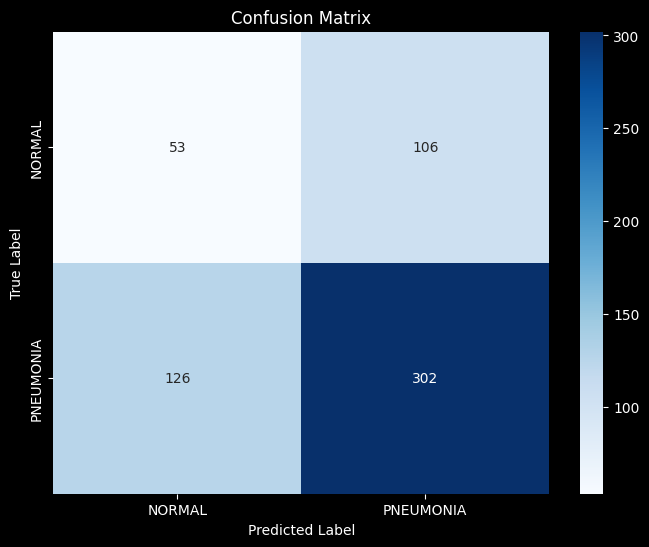

In [35]:
class_names = list(test_data.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Save Model</h1>
</div>

In [36]:
model.save('pnemonia_classifier_v1.h5')